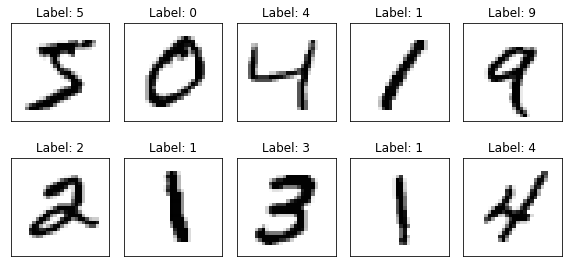

In [19]:
import numpy as np
from sklearn.mixture import GaussianMixture
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images_part = train_images[:2000]
train_labels_part = train_labels[:2000]

# 显示前10张图片
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
for ax, image, label in zip(axes.ravel(), train_images_part[:10], train_labels_part[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Label: {}'.format(label))
plt.tight_layout()
plt.show()

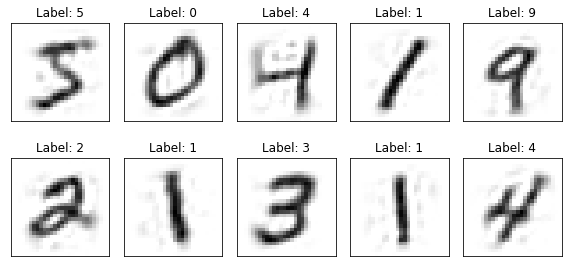

In [20]:
train_images_flatten = np.resize(train_images_part,
                                 (train_images_part.shape[0], train_images_part.shape[1] * train_images_part.shape[2]))
pca = PCA(0.85, whiten=True)
data = pca.fit_transform(train_images_flatten)

data_rec_flatten = pca.inverse_transform(data)

data_rec = np.resize(data_rec_flatten,
                     (train_images_part.shape[0], train_images_part.shape[1], train_images_part.shape[2]))
data_rec = np.maximum(data_rec, 0)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
for ax, image, label in zip(axes.ravel(), data_rec[:10], train_labels_part[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Label: {}'.format(label))

plt.tight_layout()
plt.show()

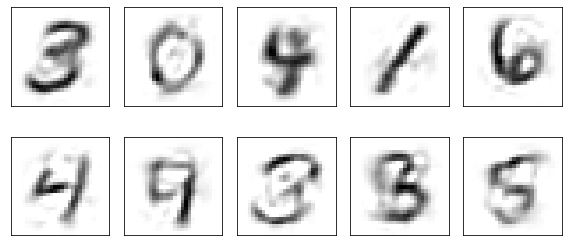

In [21]:
gmm = GaussianMixture(100, covariance_type='full', random_state=2)
gmm.fit(data)
data_new = gmm.sample(10)

digits_new = pca.inverse_transform(data_new[0])

digits_new = np.resize(digits_new,
                       (digits_new.shape[0], train_images_part.shape[1], train_images_part.shape[2]))
digits_new = np.maximum(digits_new, 0)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4))
for ax, image in zip(axes.ravel(), digits_new[:10]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()